# Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import re # regex for cleaning the tweets
#import textblob as tb
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
import pandas as pd
import altair as alt

# Data

In [3]:
df = pd.read_csv('~/Desktop/raw_forumdata_topic.csv') 

In [4]:
df.head()

,Unnamed: 0,name,date,title,body,Dominant
0,0,Spaceangel,"\n Sun, 02/05/2017 - 14:25\n",Scooter chargers ~ in general & NFPA/NEC,I have lived in a number of places in this won...,1.0
1,1,"Orphee,MEroller,Orphee,Orphee,pcarlson1979,Jac...","\n Wed, 06/20/2012 - 09:11\n ...","3500W hub motor, question about real power and...","Hi all,I have a (small) problem on my electric...",1.0
2,2,IFIMotors,"\n Tue, 06/12/2018 - 07:06\n",NEW SEVCON GEN 4 80V FOR Sale,"hello,\ni have new Sevcon controllers for sale...",1.0
3,4,"gatorsby7,power-up,Pinche","\n Tue, 11/01/2011 - 10:24\n ...",how does 24v 4-wire reversible motor work?,i have a mobility scooter (JP Cruiser - HCF305...,4.0
4,5,"tilt2468,reikiman,antiscab,tilt2468,tilt2468,m...","\n Thu, 06/11/2009 - 19:03\n ...",Lithium safety for an e-bike,I am getting some severe warnings on an e-bike...,3.0


In [5]:
df['year'] = df.date.str[18:22]

In [6]:
df = df.drop(df.columns[0:4],axis=1)

In [7]:
df.head()

,body,Dominant,year
0,I have lived in a number of places in this won...,1.0,2017
1,"Hi all,I have a (small) problem on my electric...",1.0,2012
2,"hello,\ni have new Sevcon controllers for sale...",1.0,2018
3,i have a mobility scooter (JP Cruiser - HCF305...,4.0,2011
4,I am getting some severe warnings on an e-bike...,3.0,2009


In [8]:
# Cleaning the post
# Creating a function called clean. removing hyperlink, #, RT, @mentions
def clean(x):
 x = re.sub(r'^RT[\s]+', '', x)
 x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
 x = re.sub(r'#', '', x)
 x = re.sub(r'@[A-Za-z0–9]+', '', x) 
 return x
df['body'] = df['body'].apply(clean)

In [9]:
df

,body,Dominant,year
0,I have lived in a number of places in this won...,1.0,2017
1,"Hi all,I have a (small) problem on my electric...",1.0,2012
2,"hello,\ni have new Sevcon controllers for sale...",1.0,2018
3,i have a mobility scooter (JP Cruiser - HCF305...,4.0,2011
4,I am getting some severe warnings on an e-bike...,3.0,2009
...,...,...,...
1282,I'm in the Raleigh-Durham-Chapel Hill area of ...,NaN,2012
1283,"Testing of Battery packs and modules.,OHM METE...",NaN,2013
1284,The expense of buying a home charging station ...,NaN,2013
1285,What's important about this one is that it's v...,NaN,2013


In [10]:
df.isna().sum()

body         0
Dominant    15
year         2
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df

,body,Dominant,year
0,I have lived in a number of places in this won...,1.0,2017
1,"Hi all,I have a (small) problem on my electric...",1.0,2012
2,"hello,\ni have new Sevcon controllers for sale...",1.0,2018
3,i have a mobility scooter (JP Cruiser - HCF305...,4.0,2011
4,I am getting some severe warnings on an e-bike...,3.0,2009
...,...,...,...
1267,So i have a Schwinn S500 that I am going to be...,4.0,2012
1268,"Notice:,Two KBL09401B brushless motor controll...",3.0,2012
1269,I've got a scooter frame and a motor I want to...,1.0,2012
1270,I am a bit confused about motor options due in...,2.0,2012


In [13]:
df['Dominant'] = df.Dominant.astype(str)

//anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df

,body,Dominant,year
0,I have lived in a number of places in this won...,1.0,2017
1,"Hi all,I have a (small) problem on my electric...",1.0,2012
2,"hello,\ni have new Sevcon controllers for sale...",1.0,2018
3,i have a mobility scooter (JP Cruiser - HCF305...,4.0,2011
4,I am getting some severe warnings on an e-bike...,3.0,2009
...,...,...,...
1267,So i have a Schwinn S500 that I am going to be...,4.0,2012
1268,"Notice:,Two KBL09401B brushless motor controll...",3.0,2012
1269,I've got a scooter frame and a motor I want to...,1.0,2012
1270,I am a bit confused about motor options due in...,2.0,2012


In [15]:
df.Dominant.replace(['1.0', '2.0','3.0','4.0','5.0','6.0'],
                    ['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6'], inplace=True)

//anaconda3/envs/NLP/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
df

,body,Dominant,year
0,I have lived in a number of places in this won...,Topic 1,2017
1,"Hi all,I have a (small) problem on my electric...",Topic 1,2012
2,"hello,\ni have new Sevcon controllers for sale...",Topic 1,2018
3,i have a mobility scooter (JP Cruiser - HCF305...,Topic 4,2011
4,I am getting some severe warnings on an e-bike...,Topic 3,2009
...,...,...,...
1267,So i have a Schwinn S500 that I am going to be...,Topic 4,2012
1268,"Notice:,Two KBL09401B brushless motor controll...",Topic 3,2012
1269,I've got a scooter frame and a motor I want to...,Topic 1,2012
1270,I am a bit confused about motor options due in...,Topic 2,2012


# Sentiment Analysis

In [17]:
analyser = SentimentIntensityAnalyzer()

In [18]:
compound = lambda x:analyser.polarity_scores(x).get('compound')
df['compound'] = df['body'].apply(compound)

//anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df

,body,Dominant,year,compound
0,I have lived in a number of places in this won...,Topic 1,2017,0.9604
1,"Hi all,I have a (small) problem on my electric...",Topic 1,2012,-0.9885
2,"hello,\ni have new Sevcon controllers for sale...",Topic 1,2018,0.3182
3,i have a mobility scooter (JP Cruiser - HCF305...,Topic 4,2011,0.7526
4,I am getting some severe warnings on an e-bike...,Topic 3,2009,0.9935
...,...,...,...,...
1267,So i have a Schwinn S500 that I am going to be...,Topic 4,2012,0.9811
1268,"Notice:,Two KBL09401B brushless motor controll...",Topic 3,2012,0.9767
1269,I've got a scooter frame and a motor I want to...,Topic 1,2012,0.0387
1270,I am a bit confused about motor options due in...,Topic 2,2012,0.9887


In [20]:
def f(x):
    if x >= 0.05:
        d = 'positive'
    elif x<= -0.05:
        d = 'negative'
    else:
        d = 'neutral'
    return d

In [21]:
df['Sentiment'] = df['compound'].apply(f)

//anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df

,body,Dominant,year,compound,Sentiment
0,I have lived in a number of places in this won...,Topic 1,2017,0.9604,positive
1,"Hi all,I have a (small) problem on my electric...",Topic 1,2012,-0.9885,negative
2,"hello,\ni have new Sevcon controllers for sale...",Topic 1,2018,0.3182,positive
3,i have a mobility scooter (JP Cruiser - HCF305...,Topic 4,2011,0.7526,positive
4,I am getting some severe warnings on an e-bike...,Topic 3,2009,0.9935,positive
...,...,...,...,...,...
1267,So i have a Schwinn S500 that I am going to be...,Topic 4,2012,0.9811,positive
1268,"Notice:,Two KBL09401B brushless motor controll...",Topic 3,2012,0.9767,positive
1269,I've got a scooter frame and a motor I want to...,Topic 1,2012,0.0387,neutral
1270,I am a bit confused about motor options due in...,Topic 2,2012,0.9887,positive


In [23]:
df['Sentiment'].value_counts()

positive    1047
negative     178
neutral       45
Name: Sentiment, dtype: int64

# Plot

In [24]:
SA = pd.DataFrame()
SA['Polarity'] = df.groupby(['Dominant', 'year'])['Sentiment'].value_counts().sort_index()

In [25]:
SA

Polarity
Dominant year Sentiment          
Topic 1  2007 negative          3
              neutral           1
              positive         17
         2008 negative          6
              neutral           2
...                           ...
Topic 6  2010 neutral           1
              positive         15
         2011 positive          8
         2012 positive          6
         2014 positive          1

[115 rows x 1 columns]

SAy = pd.DataFrame()
SAy['Polarity'] = df.groupby(['year'])['polarity'].value_counts().sort_index()
SAy.reset_index(inplace=True)

SAy

pivot_SAy = SAy.pivot(index='year', columns='polarity', values='Polarity')
pivot_SAy
colors = ["#006D2C", "#31A354","#74C476"]
pivot_SAy.loc[:,['negative','neutral', 'positive']].plot.bar(stacked=True, color=colors, figsize=(10,7))

In [26]:
SAt = pd.DataFrame()
SAt['Polarity'] = df.groupby(['Dominant'])['Sentiment'].value_counts().sort_index()
SAt.reset_index(inplace=True)

In [27]:
SAt

,Dominant,Sentiment,Polarity
0,Topic 1,negative,26
1,Topic 1,neutral,6
2,Topic 1,positive,154
3,Topic 2,negative,30
4,Topic 2,neutral,8
5,Topic 2,positive,182
6,Topic 3,negative,23
7,Topic 3,neutral,6
8,Topic 3,positive,226
9,Topic 4,negative,39


In [28]:
pivot_SAt = SAt.pivot(index='Dominant', columns='Sentiment', values='Polarity')
pivot_SAt

Sentiment,negative,neutral,positive
Dominant,,,
Topic 1,26,6,154
Topic 2,30,8,182
Topic 3,23,6,226
Topic 4,39,9,173
Topic 5,44,11,228
Topic 6,16,5,84


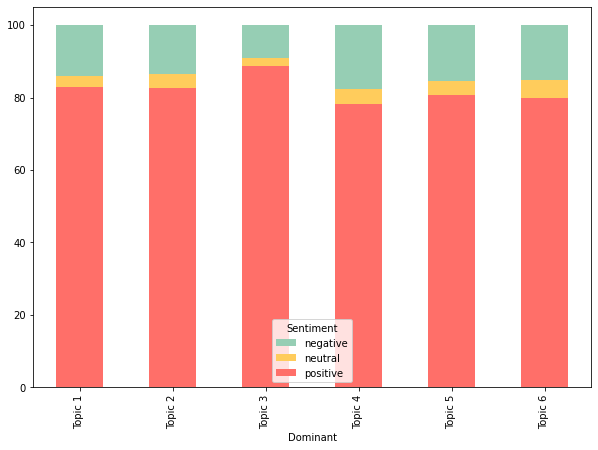

In [40]:
pivot_SAt['total'] = pivot_SAt['negative']+pivot_SAt['neutral']+pivot_SAt['positive']

pivot_SAt

pivot_SAt['negative'] = pivot_SAt['negative']*100/pivot_SAt['total']
pivot_SAt['neutral'] = pivot_SAt['neutral']*100/pivot_SAt['total']
pivot_SAt['positive'] = pivot_SAt['positive']*100/pivot_SAt['total']

pivot_SAt

pivot_SAt=pivot_SAt.drop(pivot_SAt.columns[3], axis = 1)

pivot_SAt

#colors = ["#006D2C", "#31A354","#74C476"]
colors = ['#ff6f69','#ffcc5c','#96ceb4']
ax = pivot_SAt.loc[:,['positive','neutral', 'negative']].plot.bar(stacked=True, color=colors, figsize=(10,7), grid = False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title = 'Sentiment', loc='lower center')
#plt.legend(['negative','neutral','positive'], loc='lower center')
plt.show()

In [112]:
df

,body,Dominant,year,compound,polarity
0,I have lived in a number of places in this won...,Topic 1,2017,0.9604,positive
1,"Hi all,I have a (small) problem on my electric...",Topic 1,2012,-0.9885,negative
2,"hello,\ni have new Sevcon controllers for sale...",Topic 1,2018,0.3182,positive
3,i have a mobility scooter (JP Cruiser - HCF305...,Topic 4,2011,0.7526,positive
4,I am getting some severe warnings on an e-bike...,Topic 3,2009,0.9935,positive
...,...,...,...,...,...
1267,So i have a Schwinn S500 that I am going to be...,Topic 4,2012,0.9811,positive
1268,"Notice:,Two KBL09401B brushless motor controll...",Topic 3,2012,0.9767,positive
1269,I've got a scooter frame and a motor I want to...,Topic 1,2012,0.0387,neutral
1270,I am a bit confused about motor options due in...,Topic 2,2012,0.9887,positive


In [137]:
df_neg = df[df['polarity'] == 'negative']
df_neu = df[df['polarity'] == 'neutral']
df_pos = df[df['polarity'] == 'positive']

In [138]:
df_neg

,body,Dominant,year,compound,polarity
1,"Hi all,I have a (small) problem on my electric...",Topic 1,2012,-0.9885,negative
9,A guy that lives down the street from me has a...,Topic 5,2012,-0.5796,negative
13,I need a charger for my zev. Any suggestions o...,Topic 5,2017,-0.2500,negative
21,"Hi,,I have an e-bike with 500w geared motor po...",Topic 5,2009,-0.9924,negative
33,I just found my 12V Lead-acid battery hot and ...,Topic 5,2013,-0.9980,negative
...,...,...,...,...,...
1222,I left my bike outside and now it does not wor...,Topic 1,2011,-0.2640,negative
1227,"Hello,,\nI hope someone can help me with my ne...",Topic 5,2011,-0.8209,negative
1230,Japan NC System Company converted a Suzuki EBD...,Topic 2,2011,-0.3818,negative
1241,VECTRIX owners looking for a Plug & Play LiFeP...,Topic 4,2012,-0.6235,negative


In [139]:
df_neg = df_neg.drop(df_neg.columns[[0,3]],axis=1)
df_neu = df_neu.drop(df_neu.columns[[0,3]],axis=1)
df_pos = df_pos.drop(df_pos.columns[[0,3]],axis=1)

In [140]:
neg = pd.DataFrame()
neg['count'] = df_neg.groupby(['Dominant'])['year'].value_counts().sort_index()
neg.reset_index(inplace=True)
df1 = neg.pivot(index='Dominant', columns='year', values='count')

neu = pd.DataFrame()
neu['count'] = df_neu.groupby(['Dominant'])['year'].value_counts().sort_index()
neu.reset_index(inplace=True)
df2 = neu.pivot(index='Dominant', columns='year', values='count')

pos = pd.DataFrame()
pos['count'] = df_pos.groupby(['Dominant'])['year'].value_counts().sort_index()
pos.reset_index(inplace=True)
df3 = pos.pivot(index='Dominant', columns='year', values='count')

df1

year,2007,2008,2009,2010,2011,2012,2013,2015,2016,2017
Dominant,,,,,,,,,,
Topic 1,3.0,6.0,6.0,4.0,5.0,2.0,NaN,NaN,NaN,NaN
Topic 2,6.0,10.0,5.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN
Topic 3,3.0,8.0,4.0,3.0,3.0,NaN,NaN,1.0,1.0,NaN
Topic 4,6.0,12.0,7.0,9.0,3.0,2.0,NaN,NaN,NaN,NaN
Topic 5,1.0,10.0,17.0,5.0,6.0,1.0,1.0,NaN,1.0,2.0
Topic 6,2.0,2.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
df1['2014']=0
df1['2018']=0
df1['2019']=0
df1['2020']=0
df1 = df1[['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 
           '2016', '2017', '2018', '2019', '2020']]

In [149]:
df1

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Dominant,,,,,,,,,,,,,,
Topic 1,3.0,6.0,6.0,4.0,5.0,2.0,0.0,0,0.0,0.0,0.0,0,0,0
Topic 2,6.0,10.0,5.0,4.0,3.0,2.0,0.0,0,0.0,0.0,0.0,0,0,0
Topic 3,3.0,8.0,4.0,3.0,3.0,0.0,0.0,0,1.0,1.0,0.0,0,0,0
Topic 4,6.0,12.0,7.0,9.0,3.0,2.0,0.0,0,0.0,0.0,0.0,0,0,0
Topic 5,1.0,10.0,17.0,5.0,6.0,1.0,1.0,0,0.0,1.0,2.0,0,0,0
Topic 6,2.0,2.0,8.0,4.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0


In [141]:
df1 = df1.fillna(0)
df2 = df2.fillna(0)
df3 = df3.fillna(0)

In [151]:
df2

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Dominant,,,,,,,,,,,,,,
Topic 1,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0
Topic 2,4.0,1.0,1.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0,0
Topic 3,0.0,0.0,1.0,1.0,2.0,1.0,1.0,0,0,0,0,0,0,0
Topic 4,0.0,6.0,2.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0
Topic 5,0.0,3.0,5.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0
Topic 6,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [150]:
df2['2014']=0
df2['2015']=0
df2['2016']=0
df2['2017']=0
df2['2018']=0
df2['2019']=0
df2['2020']=0
df2 = df2[['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 
           '2016', '2017', '2018', '2019', '2020']]

In [153]:
df3

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Dominant,,,,,,,,,,,,,,
Topic 1,17.0,52.0,28.0,29.0,16.0,6.0,0,1.0,0.0,1.0,2.0,2.0,0,0.0
Topic 2,51.0,58.0,30.0,18.0,17.0,6.0,0,2.0,0.0,0.0,0.0,0.0,0,0.0
Topic 3,38.0,82.0,42.0,35.0,20.0,7.0,0,1.0,1.0,0.0,0.0,0.0,0,0.0
Topic 4,22.0,71.0,33.0,21.0,19.0,3.0,0,1.0,1.0,0.0,0.0,1.0,0,1.0
Topic 5,22.0,80.0,48.0,38.0,22.0,10.0,0,4.0,1.0,1.0,0.0,2.0,0,0.0
Topic 6,14.0,26.0,14.0,15.0,8.0,6.0,0,1.0,0.0,0.0,0.0,0.0,0,0.0


In [152]:
df3['2013']=0
df3['2019']=0

df3 = df3[['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 
           '2016', '2017', '2018', '2019', '2020']]

In [154]:
total = pd.DataFrame()
total = df1 + df2 + df3

total

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Dominant,,,,,,,,,,,,,,
Topic 1,21.0,60.0,36.0,33.0,21.0,9.0,0.0,1.0,0.0,1.0,2.0,2.0,0,0.0
Topic 2,61.0,69.0,36.0,22.0,21.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,0,0.0
Topic 3,41.0,90.0,47.0,39.0,25.0,8.0,1.0,1.0,2.0,1.0,0.0,0.0,0,0.0
Topic 4,28.0,89.0,42.0,30.0,23.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1.0
Topic 5,23.0,93.0,70.0,44.0,29.0,12.0,1.0,4.0,1.0,2.0,2.0,2.0,0,0.0
Topic 6,16.0,31.0,23.0,20.0,8.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0


In [157]:
total.astype(float)

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Dominant,,,,,,,,,,,,,,
Topic 1,21.0,60.0,36.0,33.0,21.0,9.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0
Topic 2,61.0,69.0,36.0,22.0,21.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Topic 3,41.0,90.0,47.0,39.0,25.0,8.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
Topic 4,28.0,89.0,42.0,30.0,23.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
Topic 5,23.0,93.0,70.0,44.0,29.0,12.0,1.0,4.0,1.0,2.0,2.0,2.0,0.0,0.0
Topic 6,16.0,31.0,23.0,20.0,8.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
df_1 = pd.DataFrame()
df_2 = pd.DataFrame()
df_3 = pd.DataFrame()
df_1 = df1*100/total
df_2 = df2*100/total
df_3 = df3*100/total

#df_1

#df_2

#df_3

def prep_df(df, name):
    df = df.stack().reset_index()
    df.columns = ['c1', 'c2', 'values']
    df['Sentiment'] = name
    return df

df_1 = prep_df(df_1, 'Negative (%)')
df_2 = prep_df(df_2, 'Neutral (%)')
df_3 = prep_df(df_3, 'Positive (%)')

df_new = pd.concat([df_1, df_2, df_3])

df_new


,c1,c2,values,Sentiment
0,Topic 1,2007,14.285714,Negative (%)
1,Topic 1,2008,10.000000,Negative (%)
2,Topic 1,2009,16.666667,Negative (%)
3,Topic 1,2010,12.121212,Negative (%)
4,Topic 1,2011,23.809524,Negative (%)
...,...,...,...,...
51,Topic 6,2009,60.869565,Positive (%)
52,Topic 6,2010,75.000000,Positive (%)
53,Topic 6,2011,100.000000,Positive (%)
54,Topic 6,2012,100.000000,Positive (%)


In [159]:
df_new.head(15)

,c1,c2,values,Sentiment
0,Topic 1,2007,14.285714,Negative (%)
1,Topic 1,2008,10.000000,Negative (%)
2,Topic 1,2009,16.666667,Negative (%)
3,Topic 1,2010,12.121212,Negative (%)
4,Topic 1,2011,23.809524,Negative (%)
5,Topic 1,2012,22.222222,Negative (%)
6,Topic 1,2014,0.000000,Negative (%)
7,Topic 1,2016,0.000000,Negative (%)
8,Topic 1,2017,0.000000,Negative (%)
9,Topic 1,2018,0.000000,Negative (%)


In [160]:
alt.Chart(df_new).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('c2:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(values):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('c1:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('Sentiment:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#ffcc5c','#ff6f69'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)